In [1]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install interpret

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install catboost shap

In [4]:
pip install lime

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install imodels

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install matplotlib shap scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


# Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from collections import Counter
from scipy import stats
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')
sns.set()
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import RFE
plt.style.use('ggplot')
from sklearn.decomposition import PCA
import shap
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, confusion_matrix, roc_curve, roc_auc_score
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.metrics import ConfusionMatrixDisplay

## Basic Pre-Processing

### #Loading the dataset

In [10]:
bc_data= pd.read_csv("C://Users/chand/Documents/Dissertation/Dataset/Breast_cancer.csv")
bc_data

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0    ...        25.380          17.33           184.60      2019.0   
1    ...        24.990          23.41           158.80      1956.0   
2    ...        23.570          25.53           152.50      1709.0   
3    ...        14.910          26.50            98.87       567.7   
4    ...        22.540          16.67           152.20      1575.0   
..   ...           ...            ...              ...         ...   
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
0             0.16220            0.66560           0.7119   
1             0.12380            0.18660           0.2416   
2             0.14440            0.42450           0.4504   
3             0.20980            0.86630           0.6869   
4             0.13740            0.20500           0.4000   
..                ...                ...              ...   
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
0                  0.2654          0.4601                  0.11890  
1                  0.1860          0.2750                  0.08902  
2                  0.2430          0.3613                  0.08758  
3                  0.2575          0.6638                  0.17300  
4                  0.1625          0.2364                  0.07678  
..                    ...             ...                      ...  
564                0.2216       

In [11]:
bc_data.shape

(569, 32)

In [12]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [13]:
# Convert the target variable 'diagnosis' column to numerical values

bc_data['diagnosis'] = bc_data['diagnosis'].map({'M': 1, 'B': 0})

# Exploratory Data Analysis

### #Summary statistics

In [14]:
bc_data.describe()

id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min     143.500000         0.052630          0.019380        0.000000   
25%     420.300000         0.086370          0.064920        0.029560   
50%     551.100000         0.095870          0.092630        0.061540   
75%     782.700000         0.105300          0.130400        0.130700   
max    2501.000000         0.163400          0.345400        0.426800   

       concave points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count           569.000000  ...    569.000000     569.000000       569.000000   
mean              0.048919  ...     16.269190      25.677223       107.261213   
std               0.038803  ...      4.833242       6.146258        33.602542   
min               0.000000  ...      7.930000      12.020000        50.410000   
25%               0.020310  ...     13.010000      21.080000        84.110000   
50%               0.033500  ...     14.970000      25.410000        97.660000   
75%               0.074000  ...     18.790000      29.720000       125.400000   
max               0.201200  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 32 columns]

## Distribution of Target Variable

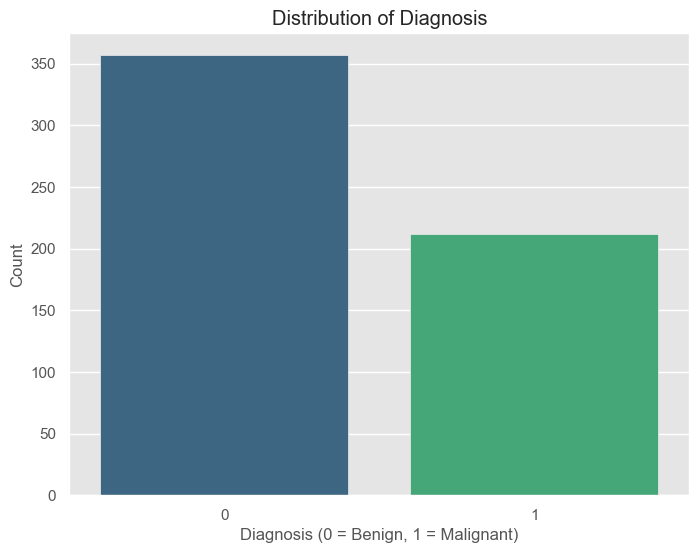

In [15]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diagnosis', data=bc_data, palette='viridis')
plt.title('Distribution of Diagnosis')
plt.xlabel('Diagnosis (0 = Benign, 1 = Malignant)')
plt.ylabel('Count')
plt.show()

### Density Graph to check the trends of data

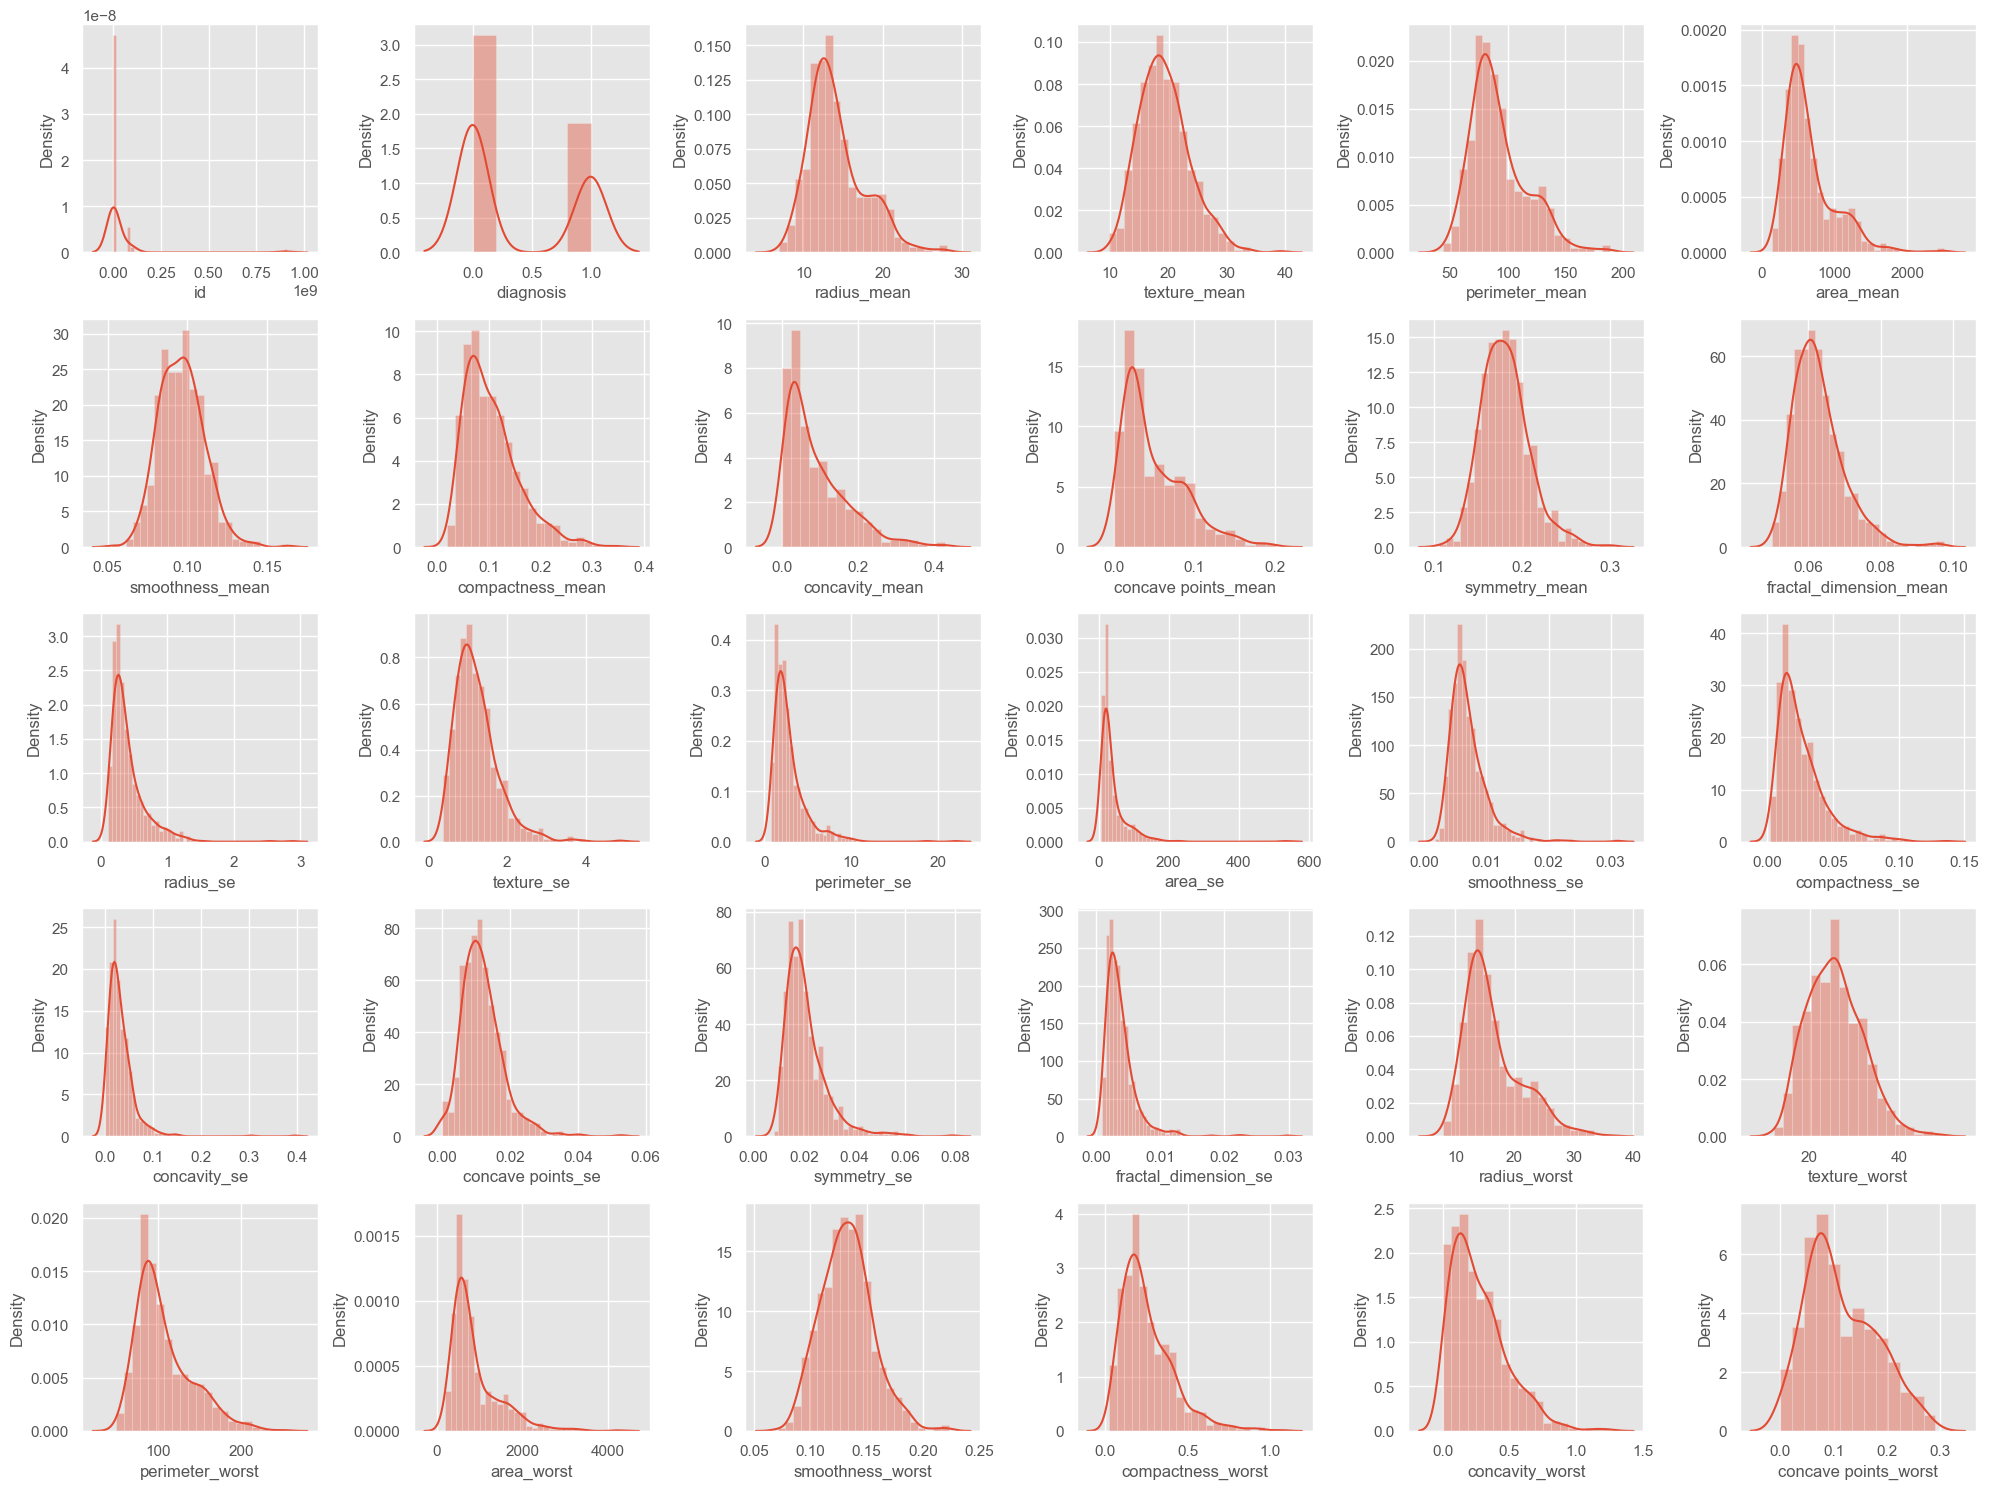

In [16]:
plt.figure(figsize=(20,15))
plotnumber = 1
for column in bc_data:
    if plotnumber<=30:
        ax = plt.subplot(5,6,plotnumber)
        sns.distplot(bc_data[column])
        plt.xlabel(column)
    plotnumber+=1

plt.tight_layout()
plt.show()

## Correlation Analysis

In [17]:
bc_data.corr()

id  diagnosis  radius_mean  texture_mean  \
id                       1.000000   0.039769     0.074626      0.099770   
diagnosis                0.039769   1.000000     0.730029      0.415185   
radius_mean              0.074626   0.730029     1.000000      0.323782   
texture_mean             0.099770   0.415185     0.323782      1.000000   
perimeter_mean           0.073159   0.742636     0.997855      0.329533   
area_mean                0.096893   0.708984     0.987357      0.321086   
smoothness_mean         -0.012968   0.358560     0.170581     -0.023389   
compactness_mean         0.000096   0.596534     0.506124      0.236702   
concavity_mean           0.050080   0.696360     0.676764      0.302418   
concave points_mean      0.044158   0.776614     0.822529      0.293464   
symmetry_mean           -0.022114   0.330499     0.147741      0.071401   
fractal_dimension_mean  -0.052511  -0.012838    -0.311631     -0.076437   
radius_se                0.143048   0.567134     0.679090      0.275869   
texture_se              -0.007526  -0.008303    -0.097317      0.386358   
perimeter_se             0.137331   0.556141     0.674172      0.281673   
area_se                  0.177742   0.548236     0.735864      0.259845   
smoothness_se            0.096781  -0.067016    -0.222600      0.006614   
compactness_se           0.033961   0.292999     0.206000      0.191975   
concavity_se             0.055239   0.253730     0.194204      0.143293   
concave points_se        0.078768   0.408042     0.376169      0.163851   
symmetry_se             -0.017306  -0.006522    -0.104321      0.009127   
fractal_dimension_se     0.025725   0.077972    -0.042641      0.054458   
radius_worst             0.082405   0.776454     0.969539      0.352573   
texture_worst            0.064720   0.456903     0.297008      0.912045   
perimeter_worst          0.079986   0.782914     0.965137      0.358040   
area_worst               0.107187   0.733825     0.941082      0.343546   
smoothness_worst         0.010338   0.421465     0.119616      0.077503   
compactness_worst       -0.002968   0.590998     0.413463      0.277830   
concavity_worst          0.023203   0.659610     0.526911      0.301025   
concave points_worst     0.035174   0.793566     0.744214      0.295316   
symmetry_worst          -0.044224   0.416294     0.163953      0.105008   
fractal_dimension_worst -0.029866   0.323872     0.007066      0.119205   

                         perimeter_mean  area_mean  smoothness_mean  \
id                             0.073159   0.096893        -0.012968   
diagnosis                      0.742636   0.708984         0.358560   
radius_mean                    0.997855   0.987357         0.170581   
texture_mean                   0.329533   0.321086        -0.023389   
perimeter_mean                 1.000000   0.986507         0.207278   
area_mean                      0.986507   1.000000         0.177028   
smoothness_mean                0.207278   0.177028         1.000000   
compactness_mean               0.556936   0.498502         0.659123   
concavity_mean                 0.716136   0.685983         0.521984   
concave points_mean            0.850977   0.823269         0.553695   
symmetry_mean                  0.183027   0.151293         0.557775   
fractal_dimension_mean        -0.261477  -0.283110         0.584792   
radius_se                      0.691765   0.732562         0.301467   
texture_se                    -0.086761  -0.066280         0.068406   
perimeter_se                   0.693135   0.726628         0.296092   
area_se                        0.744983   0.800086         0.246552   
smoothness_se                 -0.202694  -0.166777         0.332375   
compactness_se                 0.250744   0.212583         0.318943   
concavity_se                   0.228082   0.207660         0.248396   
concave points_se              0.407217   0.372320         0.380676   
symmetry_se                   -0.081629  -0.072497         0.200

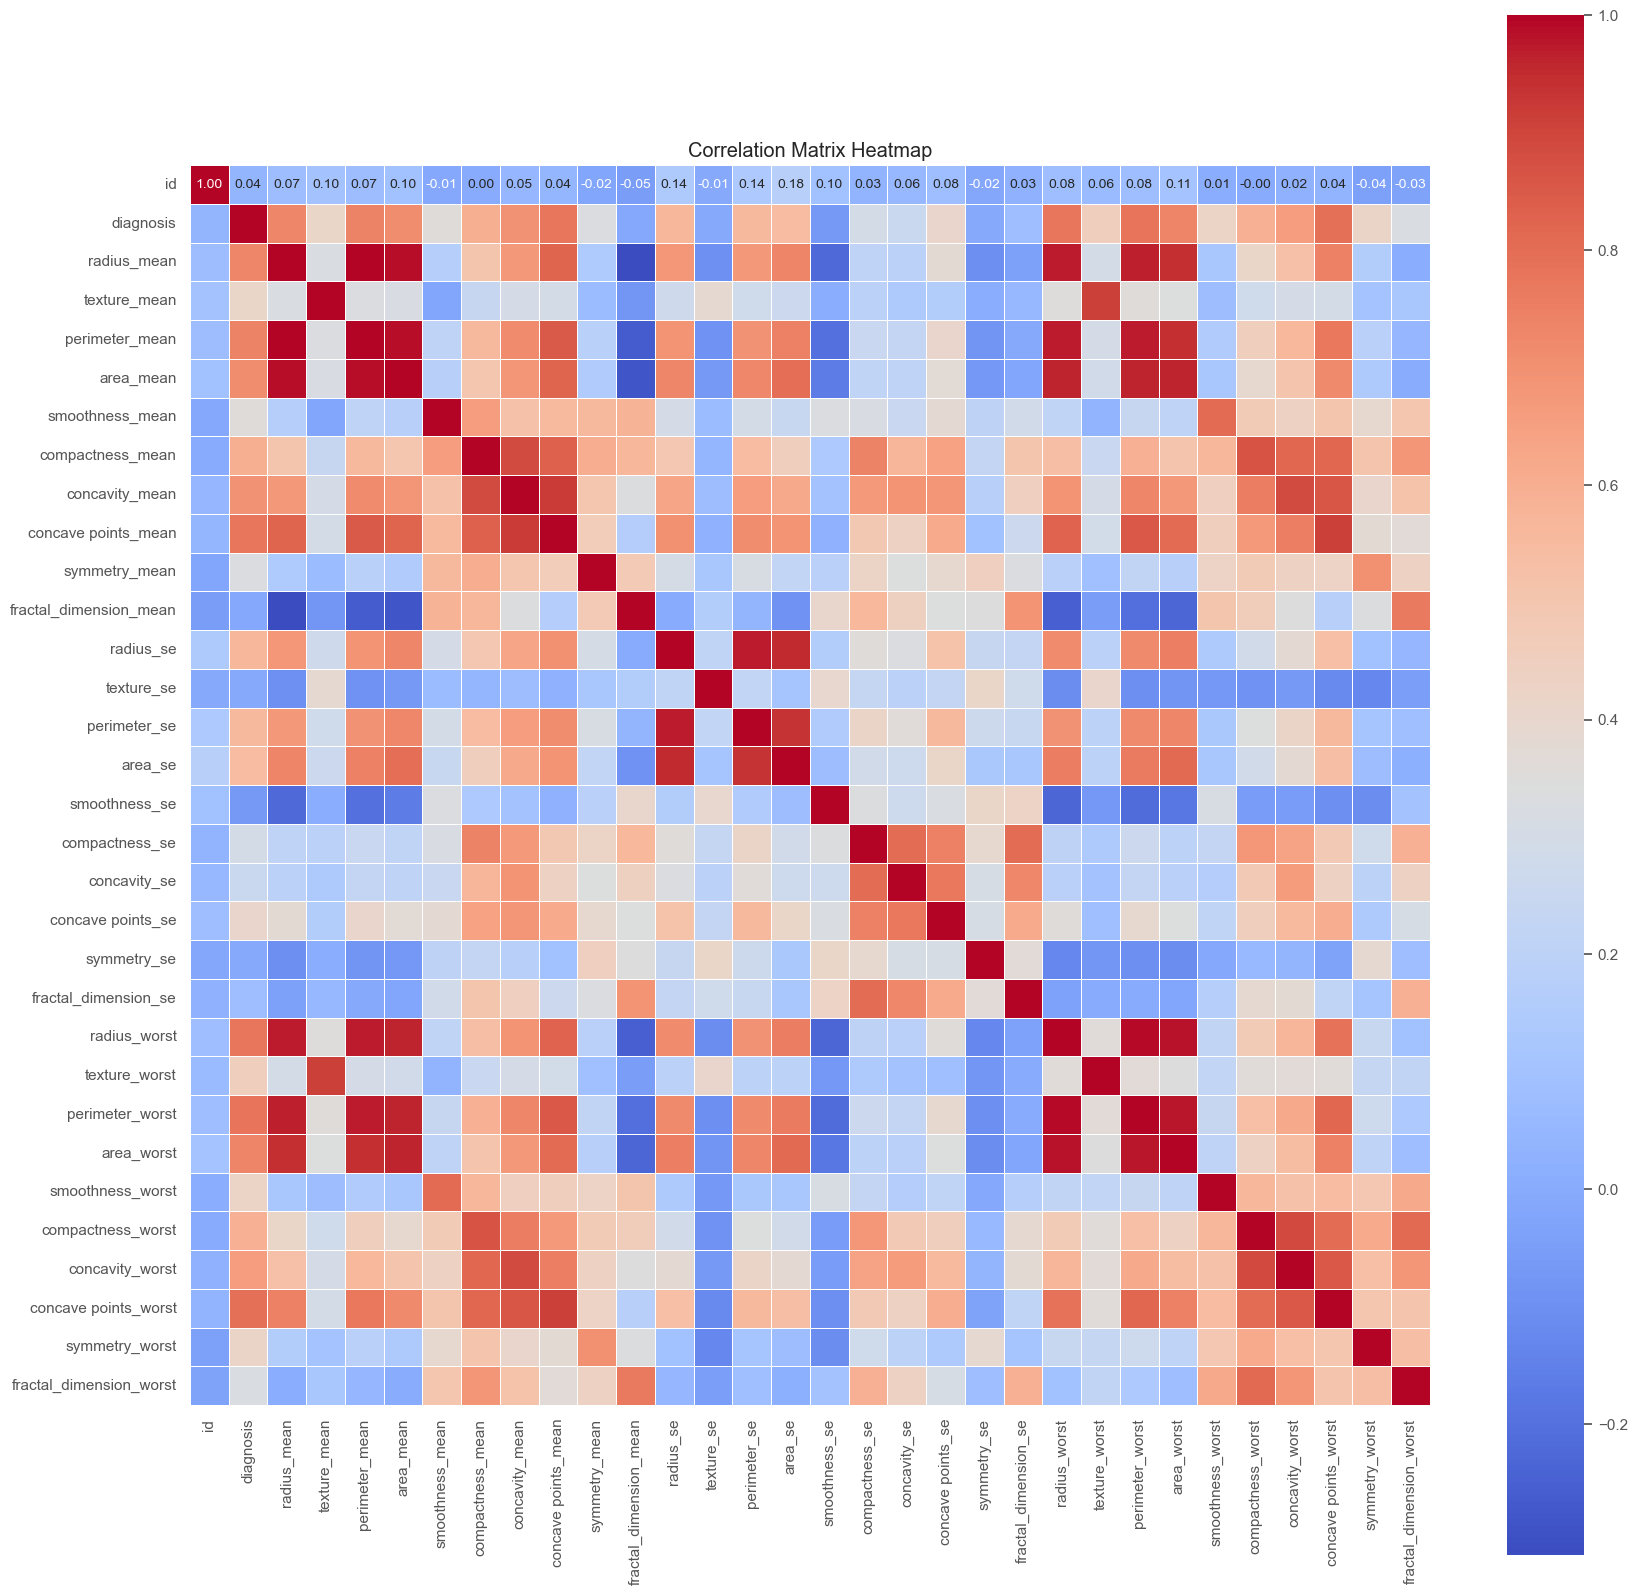

In [18]:
#Heatmap

correlation_matrix = bc_data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=.5)
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

## Handling Missing Values

In [19]:
missing_values = bc_data.isnull().sum()
missing_values

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Data Cleaning

In [20]:
#Dropping Irrelevant columns

bc_data.drop('id', axis=1, inplace=True)

In [21]:
# Checking for Duplicates

duplicates = bc_data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

Number of duplicate rows: 0


## Outlier Detection

In [22]:
X = bc_data.drop(columns=['diagnosis'])

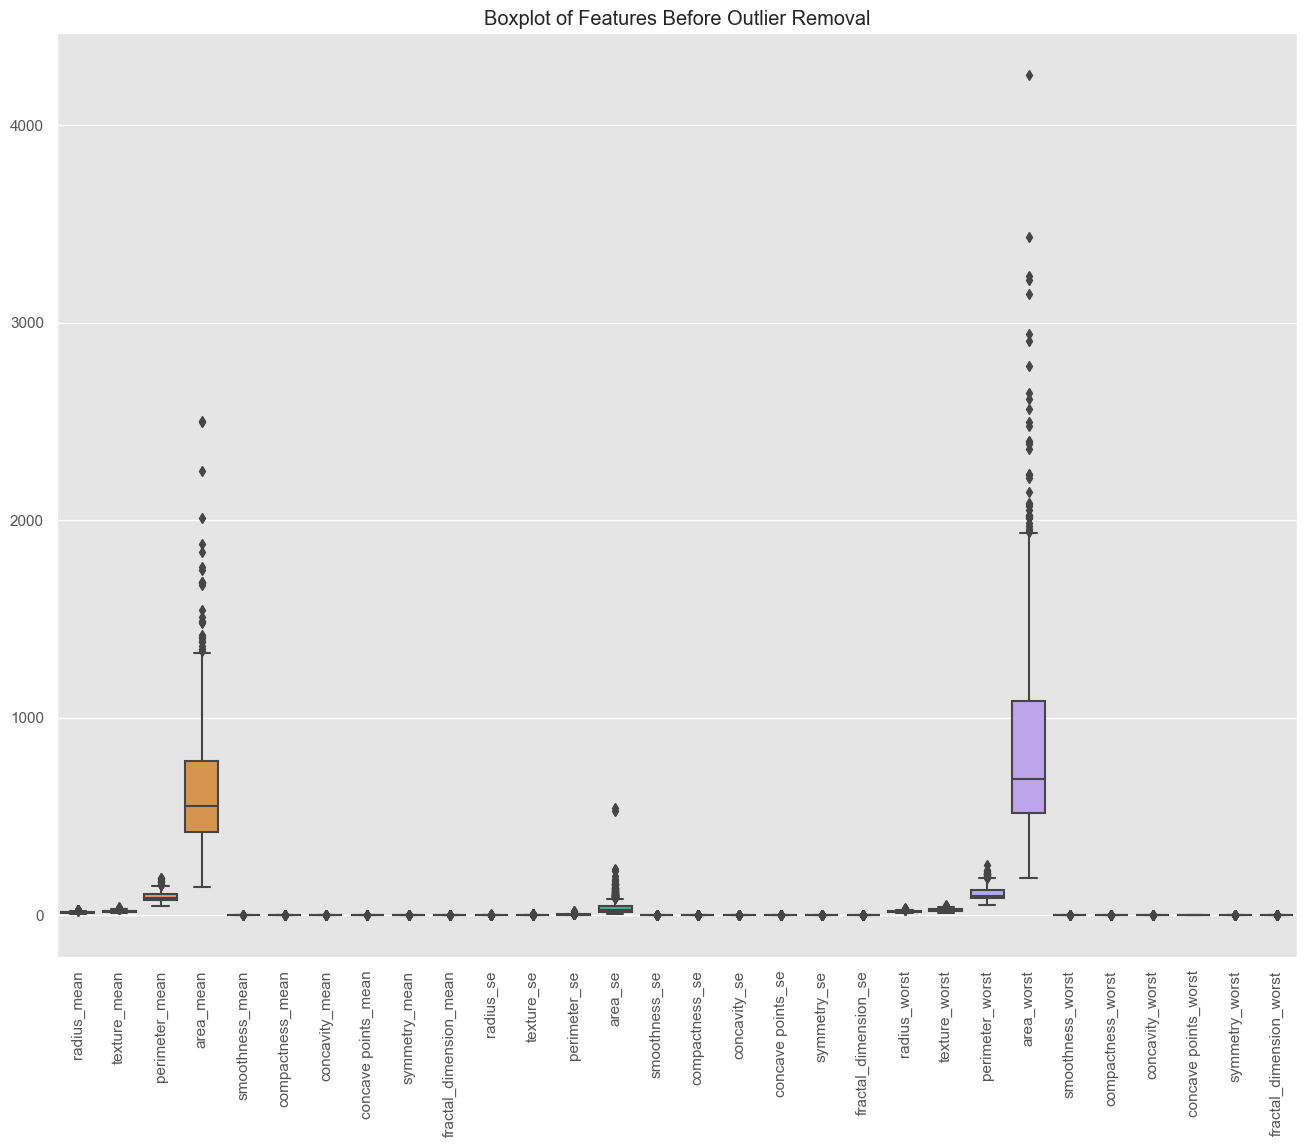

In [23]:
# Boxplot before outlier removal
plt.figure(figsize=(16, 12))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Boxplot of Features Before Outlier Removal')

plt.savefig('boxplot_before_outlier_removal.png', dpi=300, bbox_inches='tight') 
plt.show()

### Applying Isolation Forest Algorithm

In [24]:
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X)
bc_data['outlier'] = outliers

# Separating the non-outliers
bc_data_cleaned = bc_data[bc_data['outlier'] != -1].drop(columns=['outlier'])

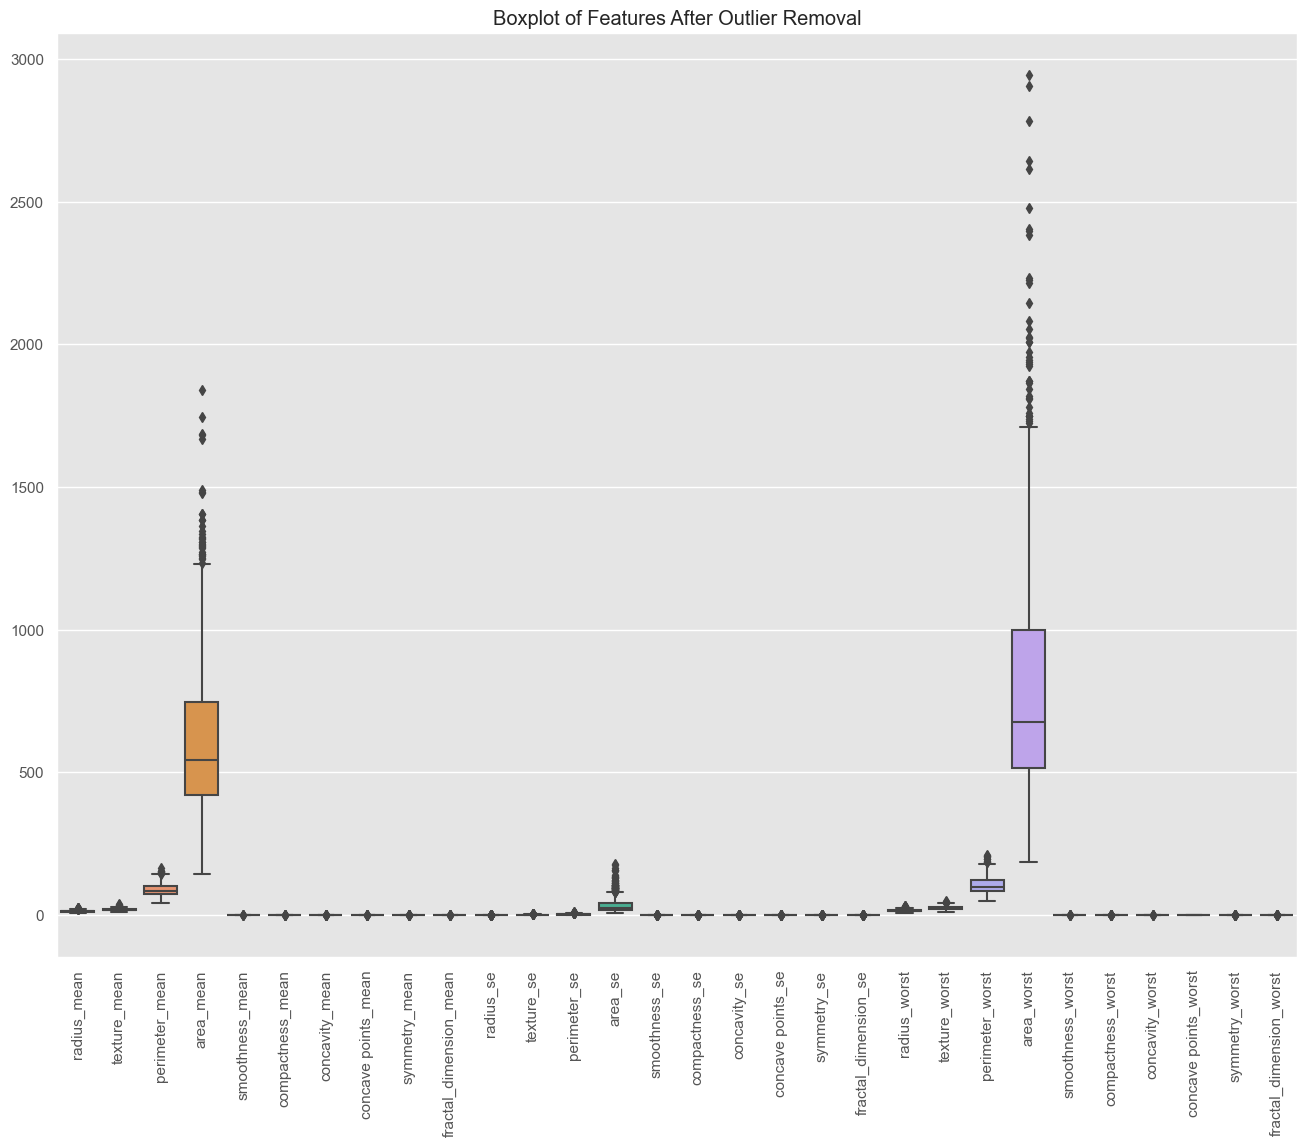

In [25]:
# Boxplot after outlier removal

X_no_outliers = bc_data_cleaned.drop(columns=['diagnosis'])
plt.figure(figsize=(16, 12))
sns.boxplot(data=X_no_outliers)
plt.xticks(rotation=90)
plt.title('Boxplot of Features After Outlier Removal')
plt.savefig('boxplot_after_outlier_removal.png', dpi=300, bbox_inches='tight') 
plt.show()

In [26]:
# cleaned dataset

print(bc_data_cleaned.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
4          1        20.29         14.34          135.10     1297.0   
5          1        12.45         15.70           82.57      477.1   
6          1        18.25         19.98          119.60     1040.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
4          0.10030           0.13280          0.1980              0.10430   
5          0.12780           0.17000          0.1578              0.08089   
6          0.09463           0.10900          0.1127              0.07400   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
1         0.1812  ...         24.99          

In [27]:
bc_data.to_csv('C://Users/chand/Downloads/pre-processed-Data.csv', index=False)

In [28]:
print(bc_data.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           

## Feature Scaling

In [29]:
scaler = StandardScaler()
features = bc_data.drop(columns=[ 'diagnosis'])
scaled_features = scaler.fit_transform(features)


In [30]:
# Convert the scaled features back to a DataFrame

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns)

## Feature Selection using RFE

In [31]:
model = RandomForestClassifier(random_state = 42)
rfe = RFE(estimator=model, n_features_to_select=10)
rfe = rfe.fit(scaled_features_df, bc_data['diagnosis'])

In [32]:
# Get the selected features
selected_features = scaled_features_df.columns[rfe.support_]
selected_features

Index(['perimeter_mean', 'area_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

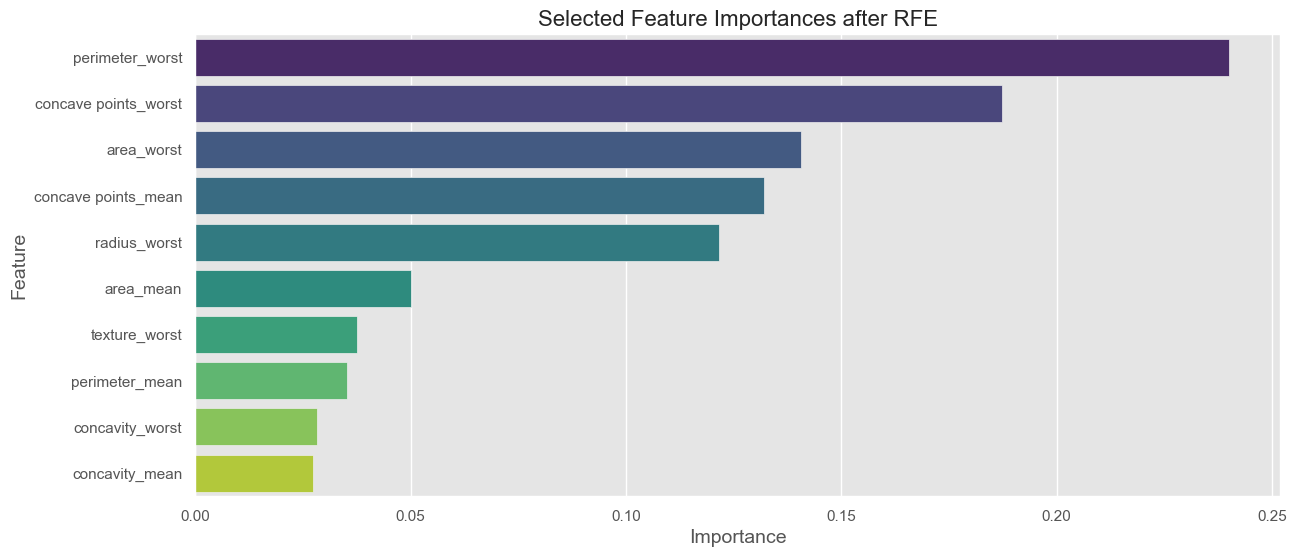

In [33]:
# Extract the selected features from the previous RFE process
selected_features = scaled_features_df.columns[rfe.support_]

# Prepare the feature importance data for the selected features
selected_importances = rfe.estimator_.feature_importances_
selected_feature_importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': selected_importances
}).sort_values(by='Importance', ascending=False)

# Horizontal Bar Plot of Selected Feature Importances
plt.figure(figsize=(14, 6))
sns.barplot(x='Importance', y='Feature', data=selected_feature_importance_df, palette='viridis', orient='h')
plt.title('Selected Feature Importances after RFE', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.show()

## Feature Engineering using Polynomial Feature

In [34]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(scaled_features_df[selected_features])

# Convert the polynomial features to a DataFrame
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names_out(selected_features))

In [35]:
# Combining the polynomial features and target variable into one DataFrame

data_poly = pd.concat([X_poly_df, bc_data['diagnosis'].reset_index(drop=True)], axis=1)
data_poly

perimeter_mean  area_mean  concavity_mean  concave points_mean  \
0          1.269934   0.984375        2.652874             2.532475   
1          1.685955   1.908708       -0.023846             0.548144   
2          1.566503   1.558884        1.363478             2.037231   
3         -0.592687  -0.764464        1.915897             1.451707   
4          1.776573   1.826229        1.371011             1.428493   
..              ...        ...             ...                  ...   
564        2.060786   2.343856        1.947285             2.320965   
565        1.615931   1.723842        0.693043             1.263669   
566        0.672676   0.577953        0.046588             0.105777   
567        1.982524   1.735218        3.296944             2.658866   
568       -1.814389  -1.347789       -1.114873            -1.261820   

     radius_worst  texture_worst  perimeter_worst  area_worst  \
0        1.886690      -1.359293         2.303601    2.001237   
1        1.805927      -0.369203         1.535126    1.890489   
2        1.511870      -0.023974         1.347475    1.456285   
3       -0.281464       0.133984        -0.249939   -0.550021   
4        1.298575      -1.466770         1.338539    1.220724   
..            ...            ...              ...         ...   
564      1.901185       0.117700         1.752563    2.015301   
565      1.536720       2.047399         1.421940    1.494959   
566      0.561361       1.374854         0.579001    0.427906   
567      1.961239       2.237926         2.303601    1.653171   
568     -1.410893       0.764190        -1.432735   -1.075813   

     concavity_worst  concave points_worst  ...  perimeter_worst area_worst  \
0           2.109526              2.296076  ...                    4.610052   
1          -0.146749              1.087084  ...                    2.902139   
2           0.854974              1.955000  ...                    1.962307   
3           1.989588              2.175786  ...                    0.137472   
4           0.613179              0.729259  ...                    1.633988   
..               ...                   ...  ...                         ...   
564         0.664512              1.629151  ...                    3.531941   
565         0.236573              0.733827  ...                    2.125741   
566         0.326767              0.414069  ...                    0.247758   
567         3.197605              2.289985  ...                    3.808245   
568        -1.305831             -1.745063  ...                    1.541355   

     perimeter_worst concavity_worst  perimeter_worst concave points_worst  \
0                           4.859506                              5.289242   
1                          -0.225278                              1.668811   
2                           1.152056                              2.634315   
3                          -0.497276                             -0.543814   
4                           0.820764                              0.976142   
..                               ...                                   ...   
564                         1.164599                              2.855189   
565                         0.336393                              1.043458   
566                         0.189198                              0.239746   
567                         7.366004                              5.275212   
568                         1.870909                              2.500212   

     area_worst^2  area_worst concavity_worst  \
0        4.004951                    4.221663   
1        3.573949                   -0.277427   
2        2.120765                    1.245085   
3        0.302523                   -1.094316   
4        1.490168                    0.748522   
..            ...                         ...   
564      4.061437                    1.339192   
565      2.234901                    0.353667   
566      0.183103                    0.13982

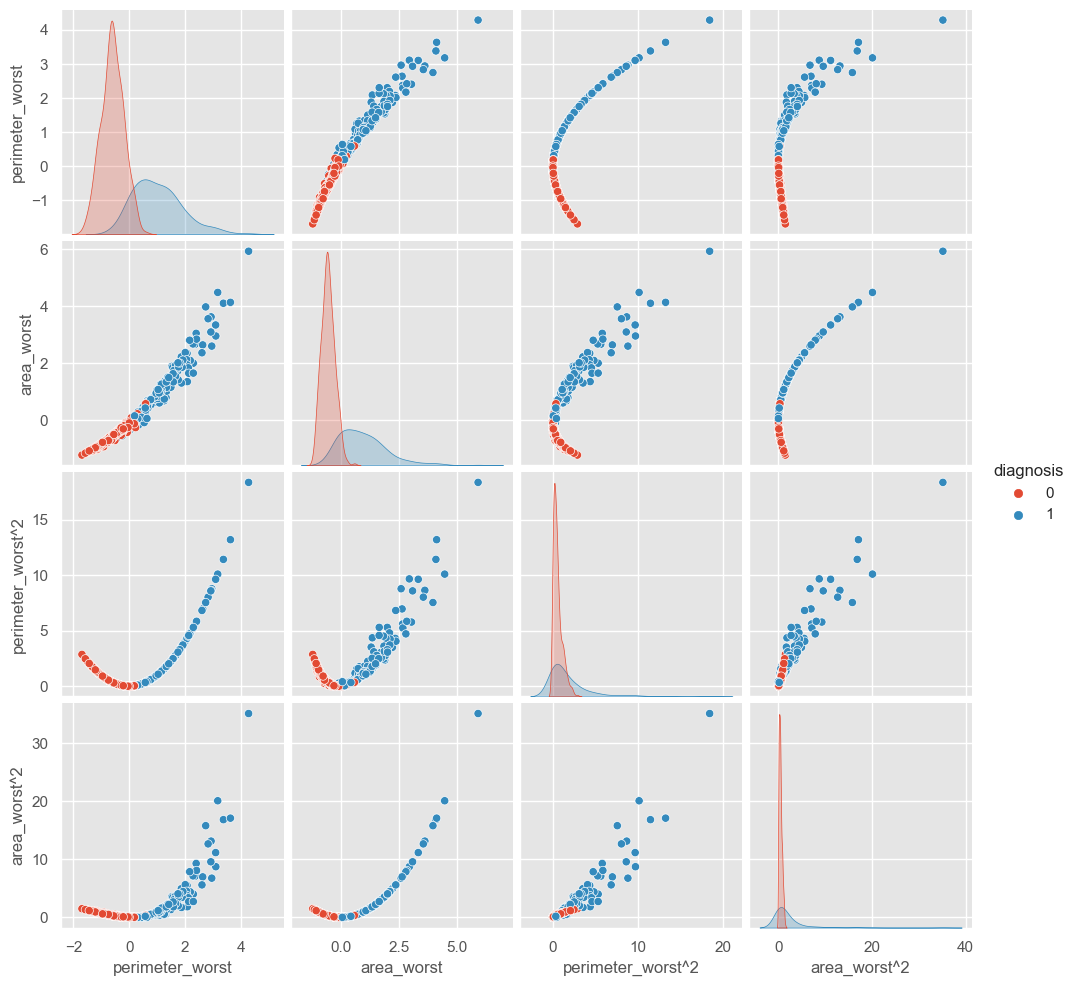

In [36]:
# Plot pairplot for a subset of polynomial features

import matplotlib.patches as mpatches

sns.pairplot(data_poly[['perimeter_worst', 'area_worst', 'perimeter_worst^2', 'area_worst^2', 'diagnosis']], hue='diagnosis')

plt.savefig('pairplot.png', dpi=300, bbox_inches='tight') 
plt.show()

## Data Balancing

In [37]:
# Separate the majority and minority classes
majority_class = data_poly[data_poly['diagnosis'] == 0]
minority_class = data_poly[data_poly['diagnosis'] == 1]

# Over-sample the minority class
minority_class_over = resample(minority_class, 
                               replace=True,  
                               n_samples=len(majority_class),  
                               random_state=42)  

# Combine the majority class with the over-sampled minority class
data_balanced_over = pd.concat([majority_class, minority_class_over])

# Split the balanced dataset into features and target variable
X_balanced_over = data_balanced_over.drop(columns=['diagnosis'])
y_balanced_over = data_balanced_over['diagnosis']

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_over, y_balanced_over, test_size=0.3, random_state=42)
print(y_train.value_counts())

diagnosis
1    259
0    240
Name: count, dtype: int64


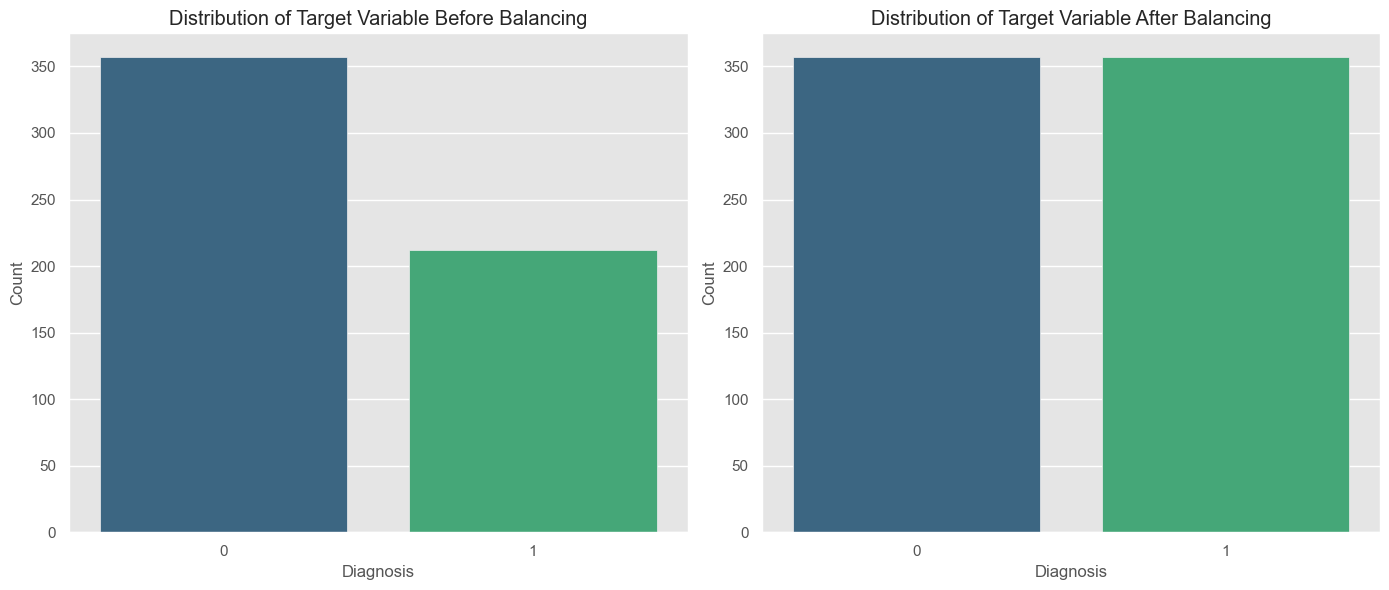

In [38]:
# Distribution of the target variable before and after balancing
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=bc_data['diagnosis'], palette='viridis')
plt.title('Distribution of Target Variable Before Balancing')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x=y_balanced_over, palette='viridis')
plt.title('Distribution of Target Variable After Balancing')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Split Data

In [39]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced_over, y_balanced_over, test_size=0.3, random_state=42)

print("Shape of training data:", X_train.shape)
print("Shape of testing data:", X_test.shape)

Shape of training data: (499, 65)
Shape of testing data: (215, 65)


# Support Vector Machine (SVM)

In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Initialize and fit the grid search
grid_search = GridSearchCV(estimator=SVC(probability=True, random_state=42),
                           param_grid=param_grid_svm, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print best parameters and best cross-validation accuracy
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")

# Getting the best SVM model
best_svm_model = grid_search.best_estimator_

# Evaluate the best model on the training data
y_train_pred = best_svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

# Evaluate the best model on the testing data
y_test_pred = best_svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'C': 100, 'gamma': 1, 'kernel': 'linear'}
Best cross-validation accuracy: 0.9720
Training Accuracy: 1.0
Testing Accuracy: 0.9395348837209302


In [41]:
# Print classification report and confusion matrix for test data
print("SVM Classification Report:\n", classification_report(y_test, y_test_pred))

# Calculate confusion matrix and sensitivity (recall) and specificity

conf_matrix_svm = confusion_matrix(y_test, y_test_pred)
sensitivity_svm = conf_matrix_svm[1, 1] / (conf_matrix_svm[1, 0] + conf_matrix_svm[1, 1])
specificity_svm = conf_matrix_svm[0, 0] / (conf_matrix_svm[0, 0] + conf_matrix_svm[0, 1])

# Print sensitivity, specificity, and confusion matrix

print("Sensitivity (Recall) for Class 1:", sensitivity_svm)
print("Specificity (True Negative Rate) for Class 0:", specificity_svm)

SVM Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       117
           1       0.92      0.95      0.93        98

    accuracy                           0.94       215
   macro avg       0.94      0.94      0.94       215
weighted avg       0.94      0.94      0.94       215

Sensitivity (Recall) for Class 1: 0.9489795918367347
Specificity (True Negative Rate) for Class 0: 0.9316239316239316


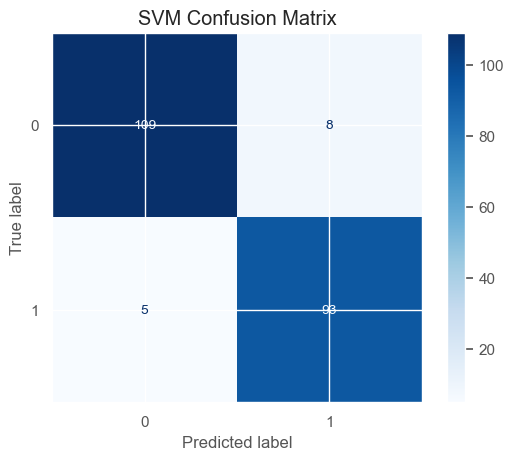

In [42]:
# Plot confusion matrix 

disp_svm = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_svm)
disp_svm.plot(cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

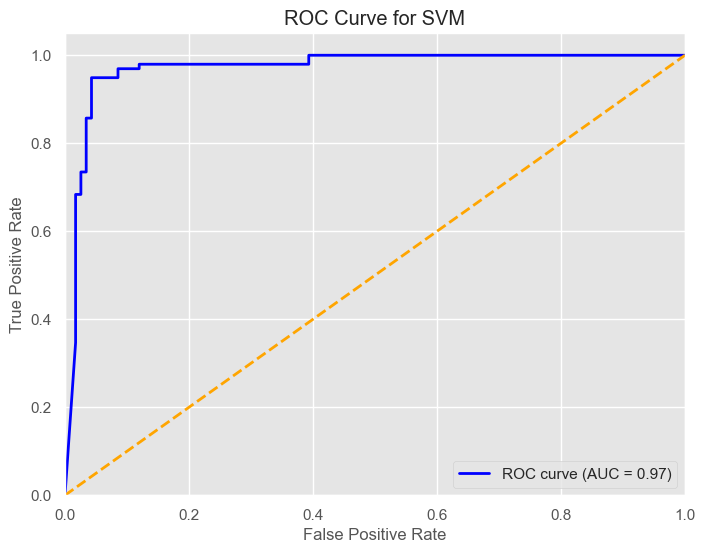

In [43]:
# Predict probabilities and compute ROC curve and AUC
y_prob_svm = best_svm_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()

## #LIME

In [44]:
import lime
import lime.lime_tabular

In [45]:
# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Benign', 'Malignant'],
    mode='classification'
)
# Explain a prediction
i = 0  # Change this index to explain different predictions
exp = explainer.explain_instance(
    data_row=X_test.values[i],
    predict_fn=best_svm_model.predict_proba
)


In [46]:
# Show the explanation
exp.show_in_notebook(show_table=True, show_all=False)

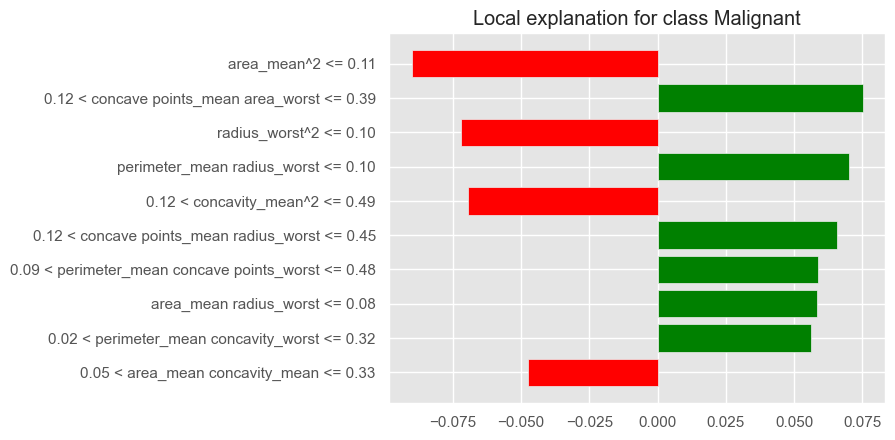

In [47]:
fig = exp.as_pyplot_figure()
plt.show()

# Multi-Layer Perceptron (MLP)

In [48]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Train MLP model
mlp_model = MLPClassifier(random_state=42, max_iter=300)
mlp_model.fit(X_train, y_train)

# Predict and evaluate the MLP model
y_pred_mlp = mlp_model.predict(X_test)

In [49]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_mlp)

classification_report_mlp = classification_report(y_test, y_pred_mlp, output_dict=True)

# Calculate sensitivity (recall) and specificity
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
sensitivity = conf_matrix_mlp[1, 1] / (conf_matrix_mlp[1, 0] + conf_matrix_mlp[1, 1])
specificity = conf_matrix_mlp[0, 0] / (conf_matrix_mlp[0, 0] + conf_matrix_mlp[0, 1])

MLP Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       117
           1       0.95      0.95      0.95        98

    accuracy                           0.95       215
   macro avg       0.95      0.95      0.95       215
weighted avg       0.95      0.95      0.95       215

MLP Accuracy: 0.9534883720930233
Sensitivity (Recall) for Class 1: 0.9489795918367347
Specificity (True Negative Rate) for Class 0: 0.9572649572649573
 MLP Confusion Matrix:


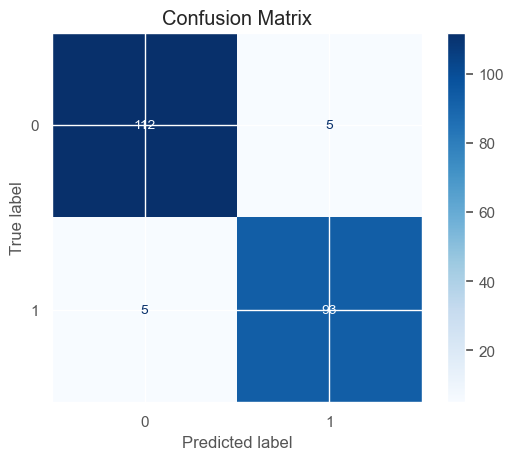

In [52]:
# Print classification report, sensitivity, specificity, and accuracy
# Classification report
print("MLP Classification Report:")
print(classification_report(y_test, y_pred_mlp))

# Accuracy score
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))
print("Sensitivity (Recall) for Class 1:", sensitivity)
print("Specificity (True Negative Rate) for Class 0:", specificity)

# Print and display the confusion matrix
print(" MLP Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_mlp)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

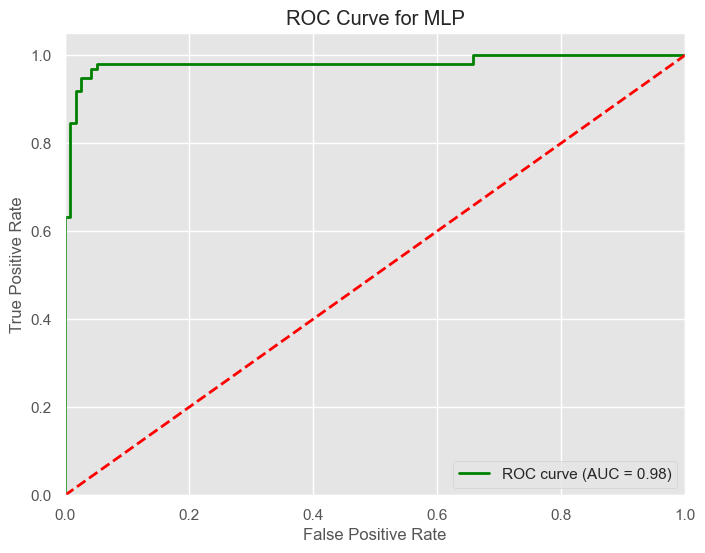

In [54]:
# Predict probabilities
y_prob_mlp = mlp_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob_mlp)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for MLP')
plt.legend(loc="lower right")
plt.show()

# Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Set random seed for reproducibility
np.random.seed(42)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],       # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],      # Number of features to consider at every split
    'max_depth': [10, 20, 30, None],       # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}

# Initialize and fit the grid search
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Print best parameters and best cross-validation accuracy
print(f"Best parameters: {rf_grid_search.best_params_}")
print(f"Best cross-validation accuracy: {rf_grid_search.best_score_:.4f}")

# Get the best Random Forest model
best_rf_model = rf_grid_search.best_estimator_

# Evaluate the best model on the training data
y_train_pred_rf = best_rf_model.predict(X_train)
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
print("Training Accuracy:", train_accuracy_rf)

# Evaluate the best model on the testing data
y_test_pred_rf = best_rf_model.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
print("Testing Accuracy:", test_accuracy_rf)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation accuracy: 0.9860
Training Accuracy: 1.0
Testing Accuracy: 0.958139534883721


In [56]:
# Print classification report and confusion matrix for test data

print("Random Forest Classification Report:\n", classification_report(y_test, y_test_pred_rf))

# Calculate confusion matrix and sensitivity (recall) and specificity

conf_matrix_rf = confusion_matrix(y_test, y_test_pred_rf)
sensitivity_rf = conf_matrix_rf[1, 1] / (conf_matrix_rf[1, 0] + conf_matrix_rf[1, 1])
specificity_rf = conf_matrix_rf[0, 0] / (conf_matrix_rf[0, 0] + conf_matrix_rf[0, 1])

# Print sensitivity, specificity, and confusion matrix

print("Sensitivity (Recall) for Class 1:", sensitivity_rf)
print("Specificity (True Negative Rate) for Class 0:", specificity_rf)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       117
           1       0.96      0.95      0.95        98

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215

Sensitivity (Recall) for Class 1: 0.9489795918367347
Specificity (True Negative Rate) for Class 0: 0.9658119658119658


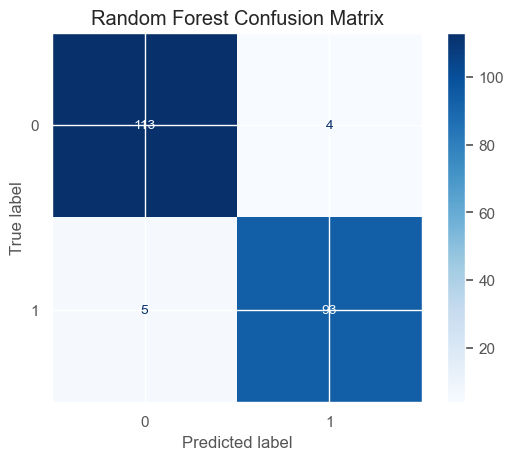

In [57]:
# Plot confusion matrix

disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf)
disp_rf.plot(cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.show()

## ROC Curve

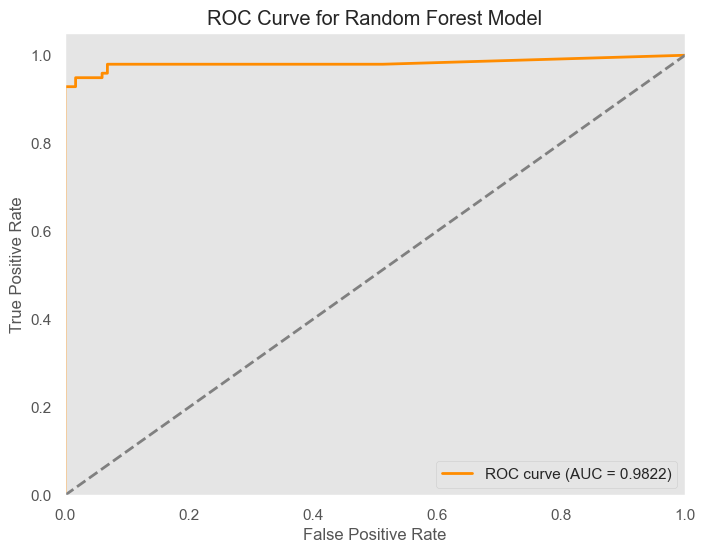

In [58]:
# Get predicted probabilities for the positive class (class 1)
y_test_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_test_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_test_proba_rf)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line (random model)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# XGBOOST

In [62]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score

In [63]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb_model, param_grid=param_grid_xgb, scoring='accuracy', cv=5, n_jobs=-1, verbose=2)
# Fit GridSearchCV
grid_search_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'eval_metric': ['logloss'],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300],
                         'objective': ['binary:logistic'],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=2)

In [64]:
# Get the best XGBoost model
best_xgb_model = grid_search_xgb.best_estimator_
print(f"Best parameters: {grid_search_xgb.best_params_}")
print(f"Best cross-validation accuracy: {grid_search_xgb.best_score_:.4f}")

# Predict on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)
y_prob_best_xgb = best_xgb_model.predict_proba(X_test)[:, 1]  # Probability estimates for ROC curve
accuracy = accuracy_score(y_test, y_pred_best_xgb)
print("XGBoost Accuracy:", accuracy)

Best parameters: {'colsample_bytree': 1.0, 'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'objective': 'binary:logistic', 'subsample': 1.0}
Best cross-validation accuracy: 0.9800
XGBoost Accuracy: 0.9627906976744186


In [65]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best_xgb))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       117
           1       0.96      0.96      0.96        98

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215



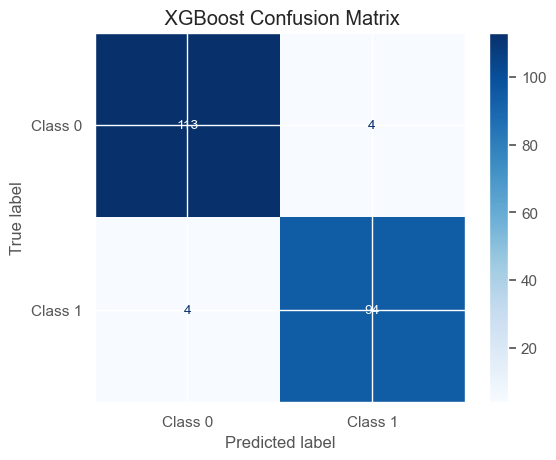

In [66]:
# Compute confusion matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_best_xgb)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_xgb, display_labels=['Class 0', 'Class 1'])
disp.plot(cmap='Blues')
plt.title(' XGBoost Confusion Matrix')
plt.show()

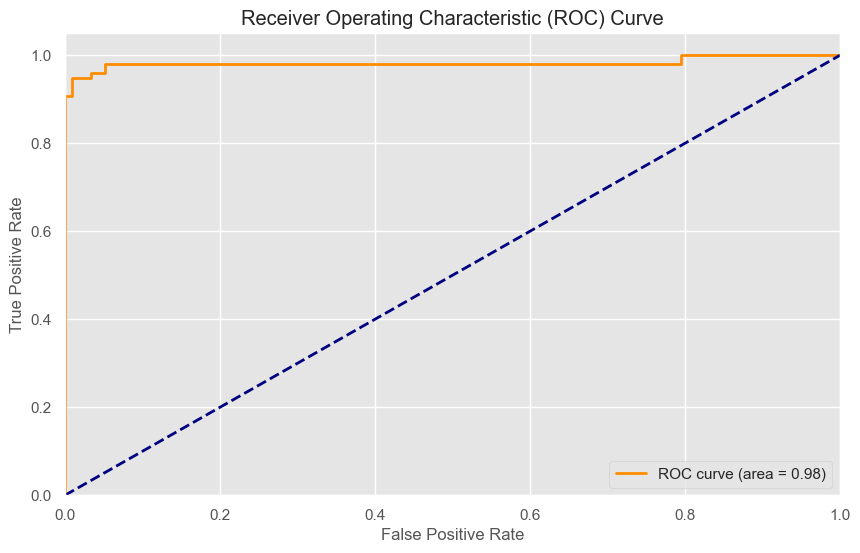

In [67]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob_best_xgb)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# XAI - SHAP

In [68]:
explainer = shap.Explainer(best_xgb_model, X_train)
shap_values = explainer(X_test)

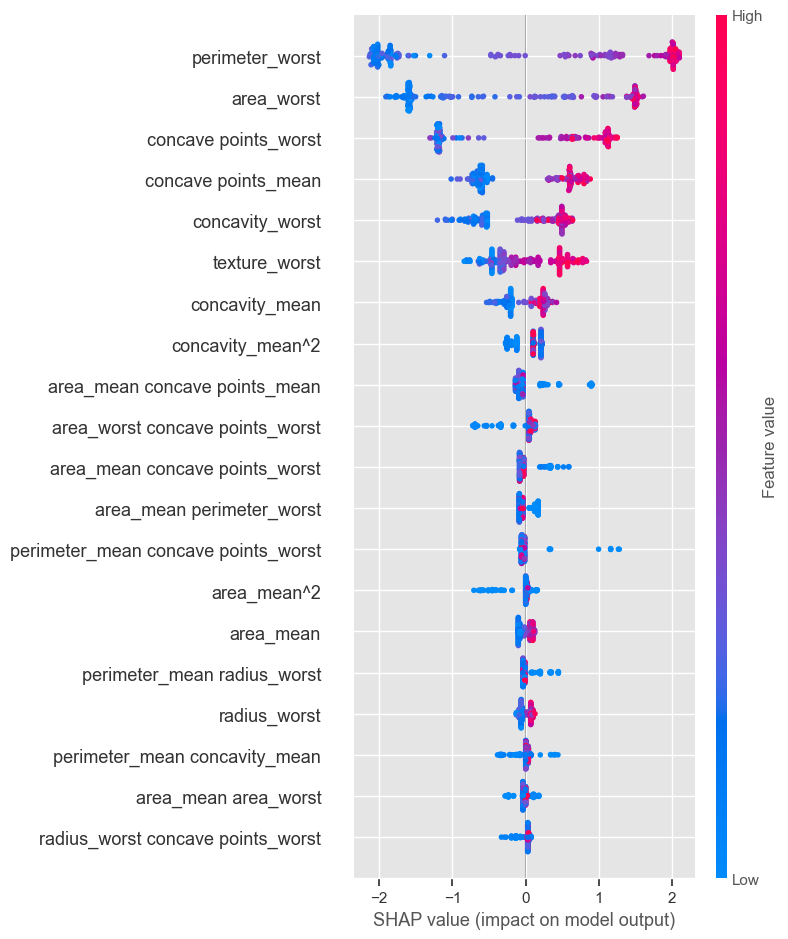

<Figure size 640x480 with 0 Axes>

In [69]:
shap.summary_plot(shap_values, X_test)
# Save the plot to a file
plt.savefig('xgboostplot.png', dpi=300, bbox_inches='tight') 
plt.show()

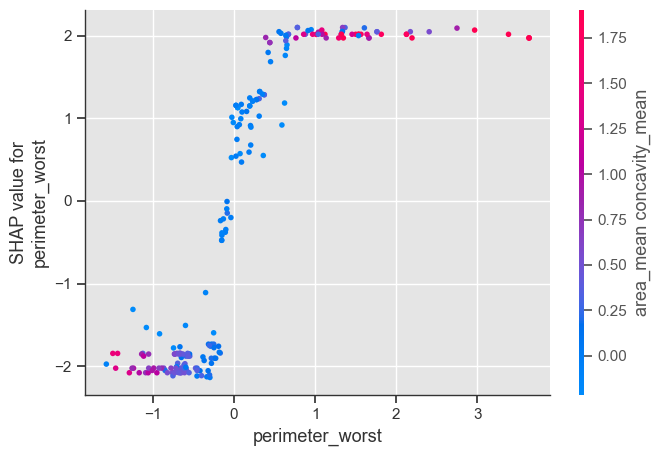

In [70]:
shap.dependence_plot("perimeter_worst", shap_values.values, X_test)

In [71]:
#force plot
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values.values[0], X_test.iloc[0, :])

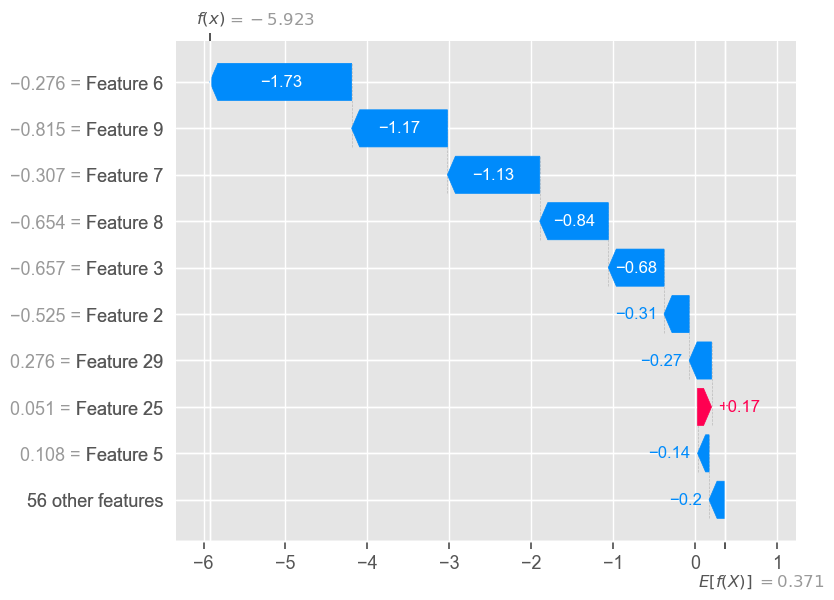

In [72]:
#waterfall plot

#Breaks down an individual prediction to show how each feature contributes to the final prediction.
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X_test.iloc[0]))

# CATBOOST

In [73]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Train CatBoost model
catboost_model = CatBoostClassifier(random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)

# Predict and evaluate the CatBoost model
y_pred_catboost = catboost_model.predict(X_test)

In [74]:
# Classification report
classification_report_catboost = classification_report(y_test, y_pred_catboost, output_dict=True)

# Calculate sensitivity (recall) and specificity

sensitivity = classification_report_catboost['1']['recall']
conf_matrix_catboost = confusion_matrix(y_test, y_pred_catboost)
specificity = conf_matrix_catboost[0, 0] / (conf_matrix_catboost[0, 0] + conf_matrix_catboost[0, 1])
accuracy = accuracy_score(y_test, y_pred_catboost)


CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       117
           1       0.97      0.95      0.96        98

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215

CatBoost Accuracy: 0.9627906976744186
Sensitivity (Recall) for Class 1: 0.9489795918367347
Specificity (True Negative Rate) for Class 0: 0.9743589743589743
Confusion Matrix:


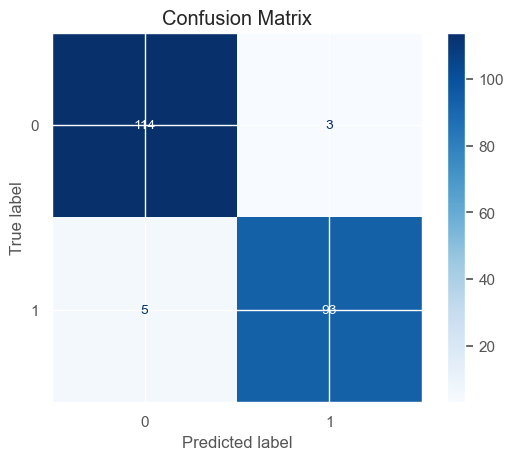

In [75]:
# Print classification report, sensitivity, specificity, and accuracy
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost))
print("CatBoost Accuracy:", accuracy)
print("Sensitivity (Recall) for Class 1:", sensitivity)
print("Specificity (True Negative Rate) for Class 0:", specificity)

# Print confusion matrix
print("Confusion Matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_catboost)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

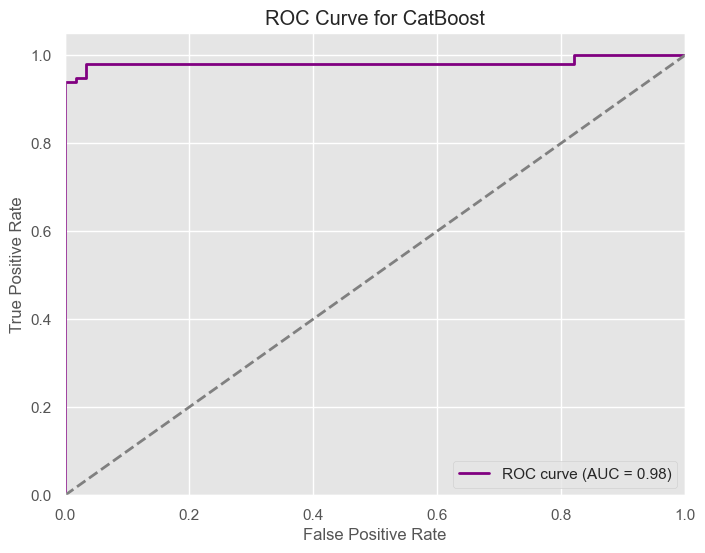

In [76]:
# Predict probabilities
y_prob_catboost = catboost_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob_catboost)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for CatBoost')
plt.legend(loc="lower right")
plt.show()

# SHAP - CATBOOST

In [77]:
explainer1 = shap.TreeExplainer(catboost_model)
shap_values1 = explainer.shap_values(X_test)

In [78]:
if isinstance(shap_values, list):
    shap_values1 = shap_values[0]

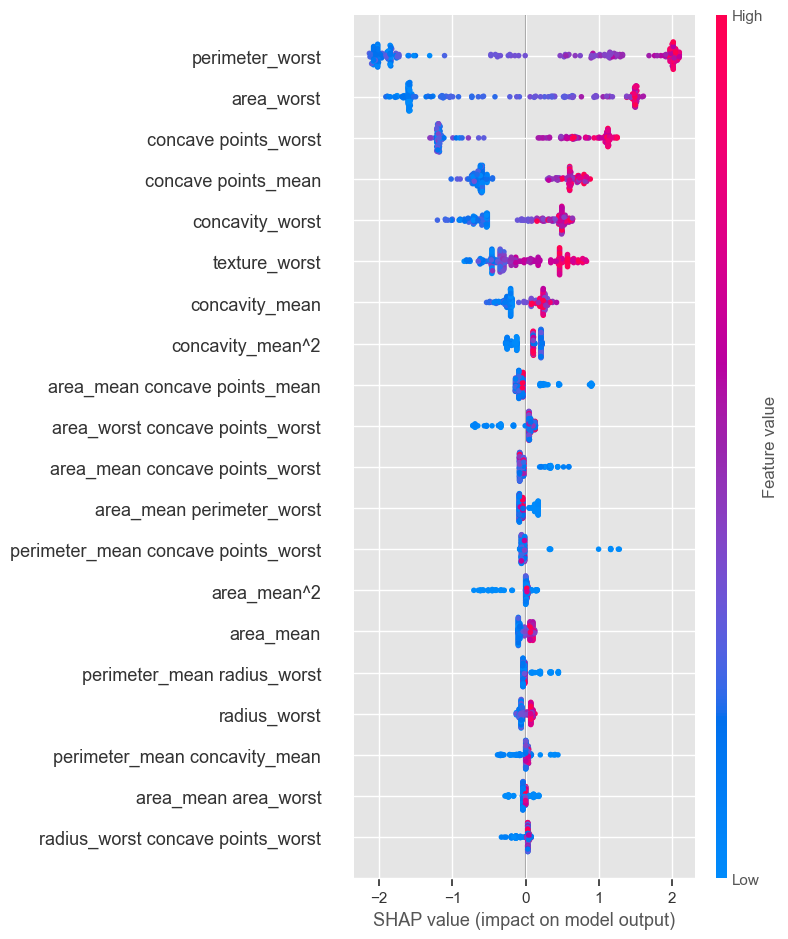

In [79]:
# Summary plot
shap.summary_plot(shap_values1, X_test)

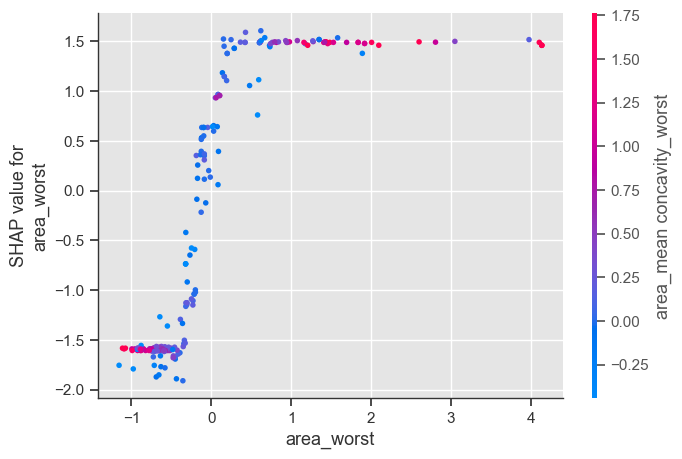

In [80]:
# Dependence plot for a specific feature

shap.dependence_plot("area_worst", shap_values1, X_test)

In [81]:
# Calculating SHAP interaction values

explainer_catboost = shap.TreeExplainer(catboost_model)
shap_interaction_values_catboost = explainer_catboost.shap_interaction_values(X_test)

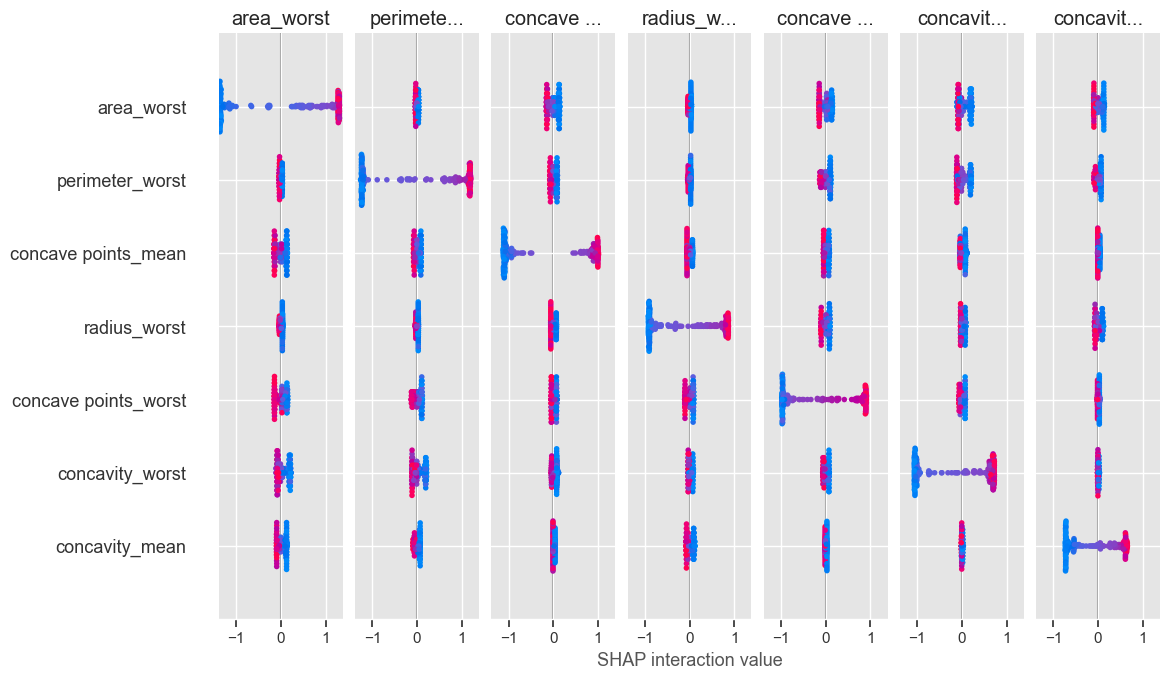

In [82]:
# Interaction value matrix plot

shap.summary_plot(shap_interaction_values_catboost, X_test,  plot_type="interaction")

# Stacking Classifier - Meta-model

### #Defining all the base models

In [107]:
from xgboost import XGBClassifier
# Define base models
base_models = [
    ('MLP', MLPClassifier(random_state=42, max_iter=300)),
    ('XGBoost', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')),
    ('CatBboost', CatBoostClassifier(random_state=42, verbose=0))
]

In [108]:
# Define meta-learner

meta_learner = LogisticRegression()

In [109]:
# Creating stacking classifier

stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5  # Cross-validation folds for stacking
)

In [110]:
# Training the stacking classifier

stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('MLP',
                                MLPClassifier(max_iter=300, random_state=42)),
                               ('XGBoost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='mlogloss',
                                              feature_types=None, gamma=None,
                                              grow_poli...
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('CatBboost',
                                <catboost.core.CatBoostClassifier object at 0x0000029A741B6D10>)],
                   final_estimator=LogisticRegression())

In [111]:
# Predict and evaluate the stacking classifier

y_pred_stacking = stacking_clf.predict(X_test)
y_prob_stacking = stacking_clf.predict_proba(X_test)[:, 1]

Stacking Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       117
           1       0.97      0.95      0.96        98

    accuracy                           0.96       215
   macro avg       0.96      0.96      0.96       215
weighted avg       0.96      0.96      0.96       215

Stacking Classifier Accuracy: 0.9627906976744186
Sensitivity (Recall) for Class 1: 0.9489795918367347
Specificity (True Negative Rate) for Class 0: 0.9743589743589743
Confusion Matrix:
[[114   3]
 [  5  93]]


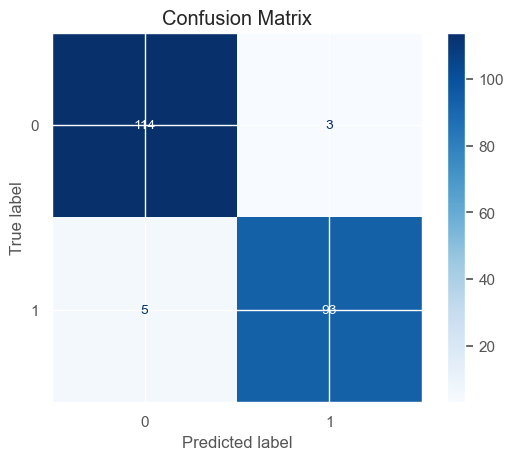

In [112]:
# Classification report
print("Stacking Classifier Classification Report:")
print(classification_report(y_test, y_pred_stacking))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred_stacking)
print("Stacking Classifier Accuracy:", accuracy)

# Calculate sensitivity (recall) and specificity
conf_matrix_stacking = confusion_matrix(y_test, y_pred_stacking)
sensitivity = conf_matrix_stacking[1, 1] / (conf_matrix_stacking[1, 0] + conf_matrix_stacking[1, 1])
specificity = conf_matrix_stacking[0, 0] / (conf_matrix_stacking[0, 0] + conf_matrix_stacking[0, 1])
print("Sensitivity (Recall) for Class 1:", sensitivity)
print("Specificity (True Negative Rate) for Class 0:", specificity)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix_stacking)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_stacking)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

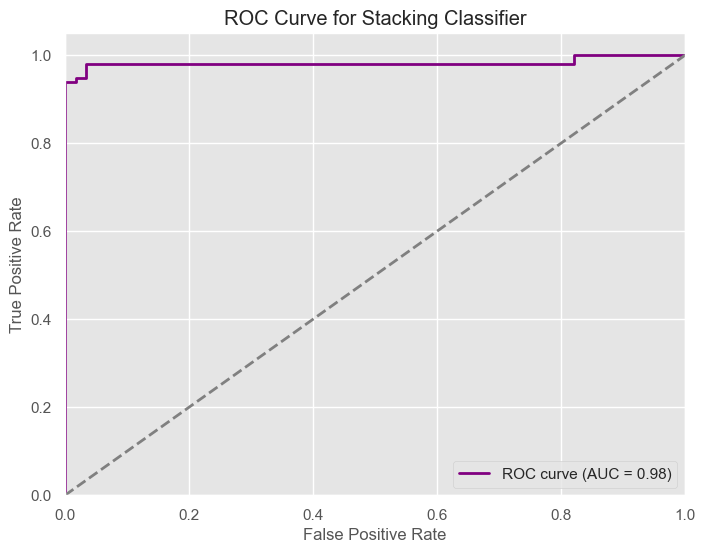

In [113]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stacking Classifier')
plt.legend(loc="lower right")
plt.show()

# PDP

In [114]:
from sklearn.inspection import PartialDependenceDisplay

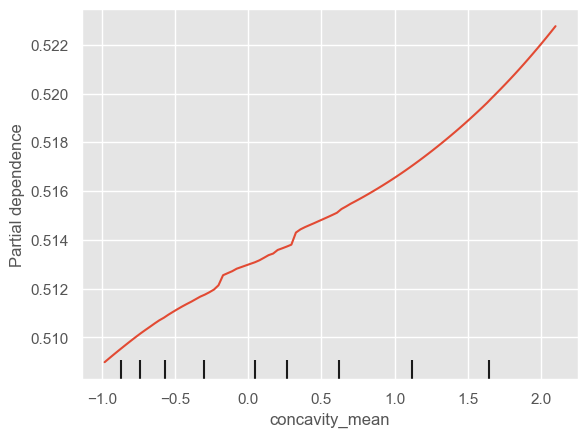

In [115]:
# For a single feature

PartialDependenceDisplay.from_estimator(stacking_clf, X_train, [2], feature_names=X_train.columns)
plt.show()

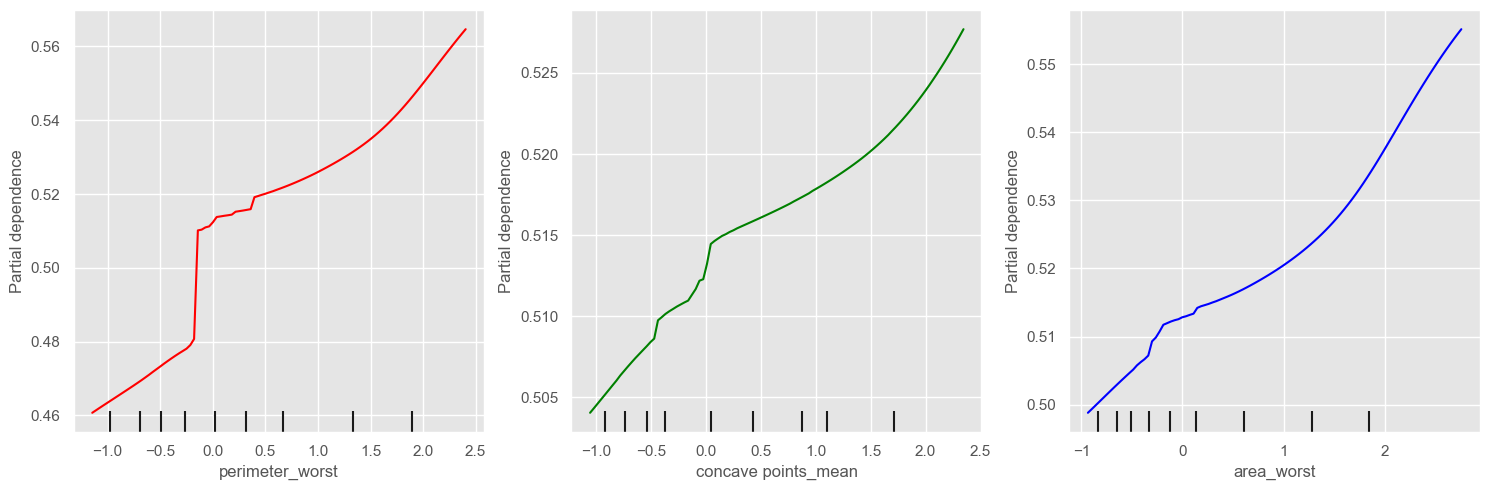

In [116]:
# Define colors for each feature
colors = ['red', 'green', 'blue']

# Create PDP plots with different colors
fig, axs = plt.subplots(1, len(features), figsize=(15, 5))

features = [6, 3, 7]  # Indices of features to plot

for i, (feature, color) in enumerate(zip(features, colors)):
    PartialDependenceDisplay.from_estimator(stacking_clf, X_train, [feature], feature_names=X_train.columns, ax=axs[i], line_kw={'color': color})

plt.tight_layout()
plt.show()

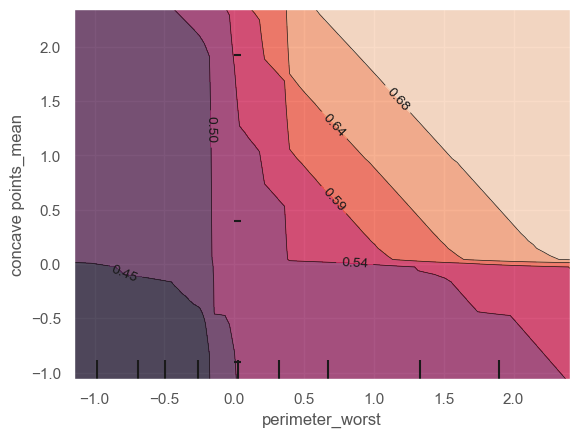

In [117]:
# For interaction between two features

PartialDependenceDisplay.from_estimator(stacking_clf, X_train, [(6, 3)], feature_names=X_train.columns)
plt.show()

In [118]:
import lime
from lime.lime_tabular import LimeTabularExplainer

explainer = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['0', '1'], mode='classification')
lime_exp = explainer.explain_instance(X_test.iloc[0].values, stacking_clf.predict_proba)
lime_exp.show_in_notebook()